In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df_60= pd.read_csv('df_audio_analysis_60.csv')
df_all= pd.read_csv('df_audio_analysis_sample.csv')
df_combined=pd.read_csv('df_aax_combined.csv')

ESTO DE ABAJO ERA PARA CREAR YEARS A PARTIR DE LA FECHA DE PUBLICACION

In [77]:
#Este es el de los picos que decías que queda mejor por lustros
def plot_media_por_año(df, parametros, year_column='lustrum', figsize=(10,6)):
 
    plt.figure(figsize=figsize)
    
    # Graficar cada parámetro
    for parametro in parametros:
        sns.lineplot(x=year_column, y=parametro, data=df, label=parametro)
    
    # Configurar la gráfica
    plt.title(f'Media de {", ".join(parametros)} por Año', fontsize=16)
    plt.xlabel('Año', fontsize=14)
    plt.ylabel('Media', fontsize=14)
    plt.legend(title="Parámetros")
    plt.grid(True)
    plt.xticks(rotation=45)
    
    # Mostrar la gráfica
    plt.show()

In [ ]:
def plot_media_por_año(df, parametros, year_column='lustrum', figsize=(10,6)):
 
    plt.figure(figsize=figsize)
    
    # Graficar cada parámetro
    for parametro in parametros:
        sns.lineplot(x=year_column, y=parametro, data=df, label=parametro)
    
    # Configurar la gráfica
    plt.title(f'Media de {", ".join(parametros)} por Año', fontsize=16)
    plt.xlabel('Año', fontsize=14)
    plt.ylabel('Media', fontsize=14)
    plt.legend(title="Parámetros")
    plt.grid(True)
    plt.xticks(rotation=45)
    
    # Mostrar la gráfica
    plt.show()

In [59]:
#gráfico de barras para un solo df
def bar_media_por_año(df, parametros, year_column='lustrum', figsize=(10,6), grid=True):

    plt.figure(figsize=figsize)
    
    # Graficar cada parámetro
    for param in parametros:
        sns.barplot(df, x=df[year_column],y=df[param])
    
    # Configurar la gráfica
    plt.title(f'Media de {", ".join(parametros)} por Año', fontsize=16)
    plt.xlabel('Año', fontsize=14)
    plt.ylabel(f'{", ".join(parametros)}', fontsize=14)
    plt.legend(title="Parámetros")
    plt.grid(grid)
    plt.xticks(rotation=45)
    
    # Mostrar la gráfica
    plt.show()


In [60]:
# Agrupar por lustro
df_grouped_lustros_popularity = df_combined.groupby('lustrum').agg({'sp_popularity': 'mean'}).reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


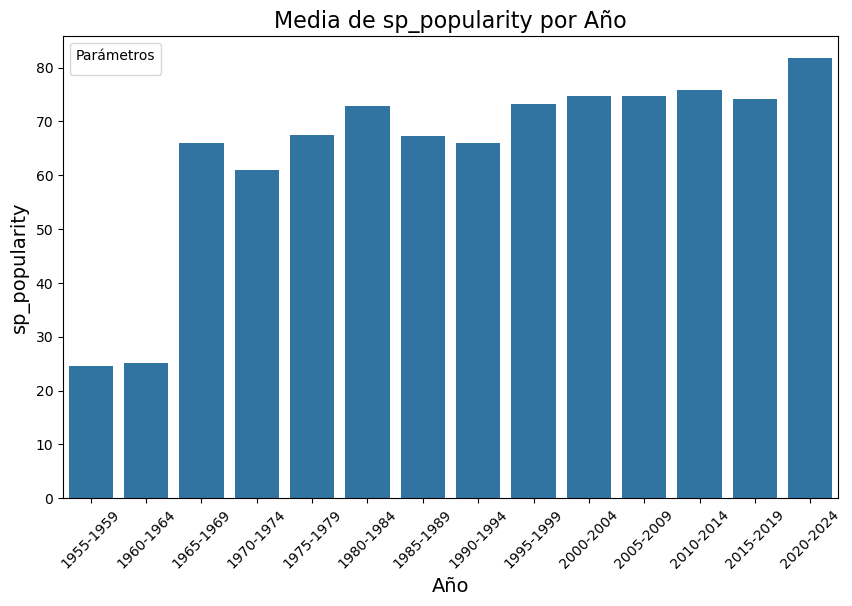

In [61]:
bar_media_por_año(df_grouped_lustros_popularity, parametros=['sp_popularity'], year_column='lustrum', figsize=(10,6), grid=False)

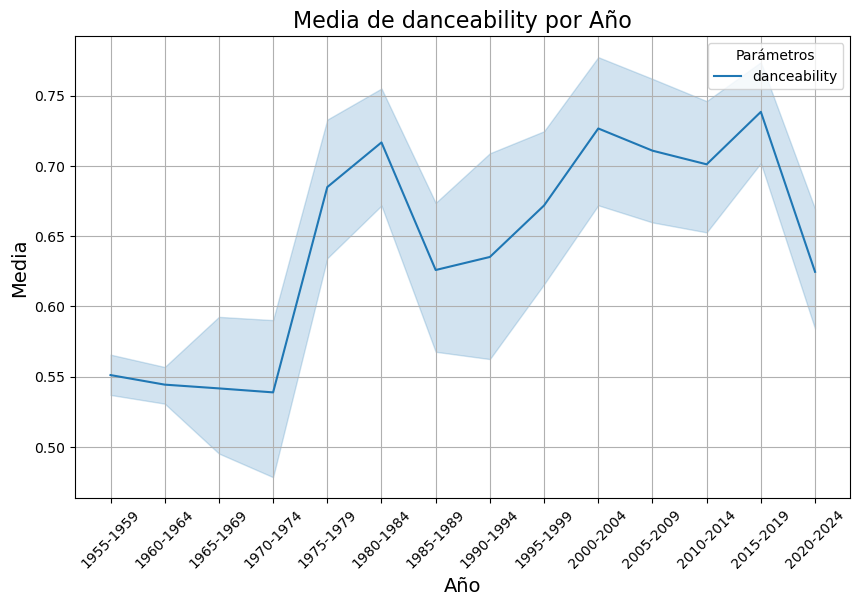

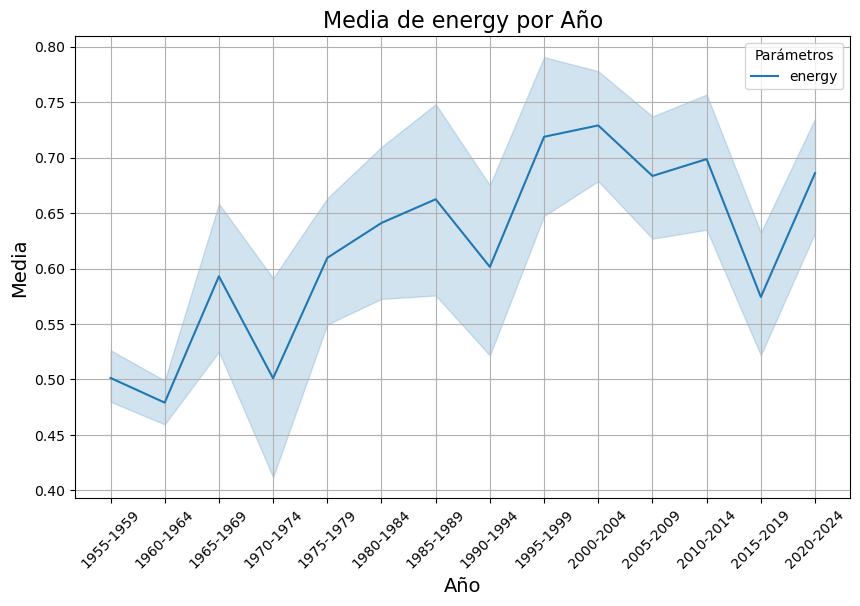

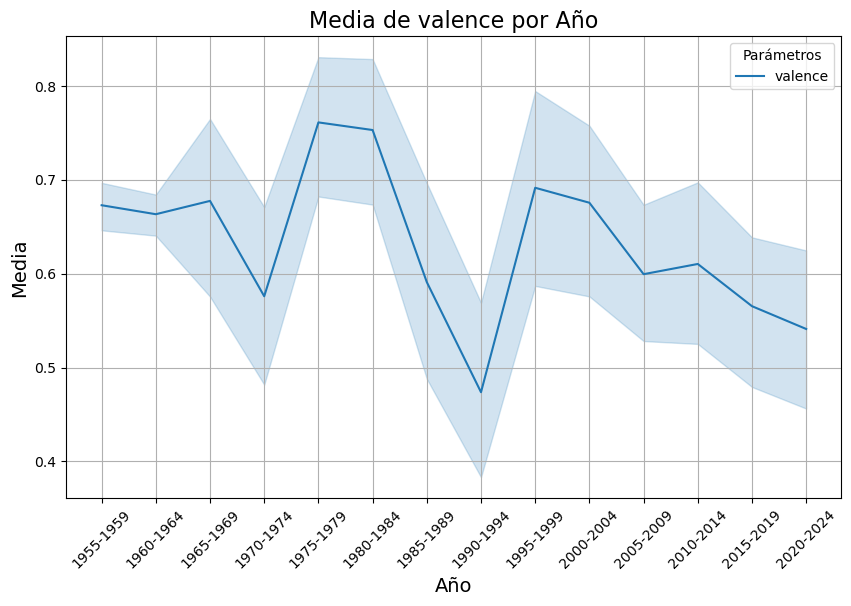

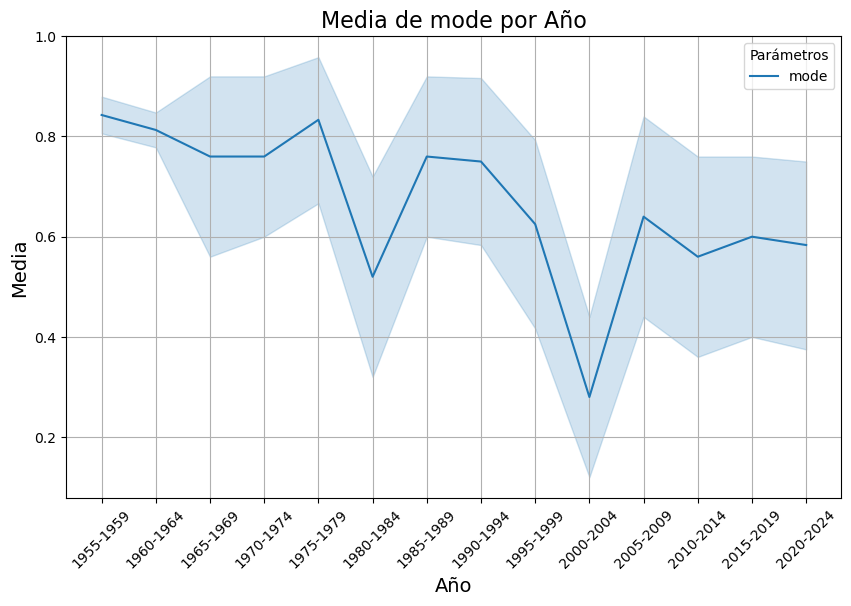

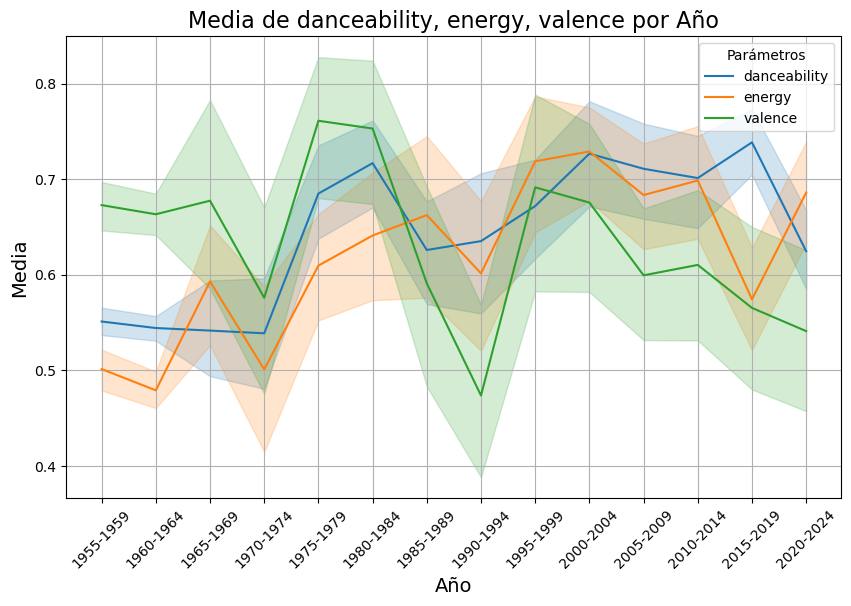

In [78]:
plot_media_por_año(df_combined, parametros=['danceability'])
plot_media_por_año(df_combined, parametros=['energy'])
plot_media_por_año(df_combined, parametros=['valence'])
plot_media_por_año(df_combined, parametros=['mode'])
plot_media_por_año(df_combined, parametros=['danceability','energy','valence'])


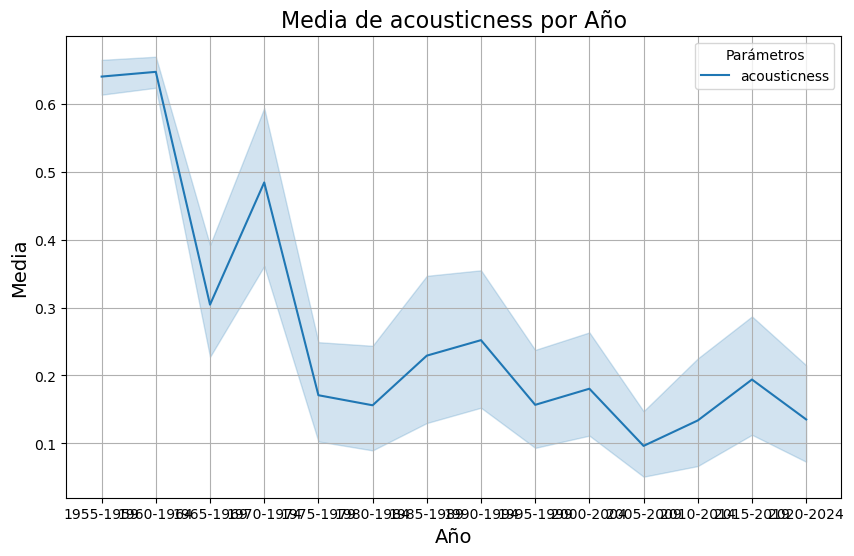

In [63]:
plot_media_por_año(df_combined, parametros=['acousticness'])

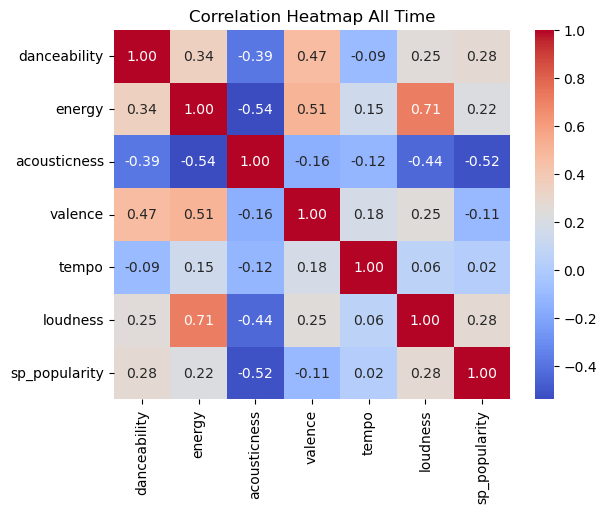

In [64]:
# Calcular la matriz de correlación
corr = df_combined[['danceability', 'energy', 'acousticness', 'valence', 'tempo', 'loudness','sp_popularity']].corr()

# Crear el heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap All Time')
plt.show()

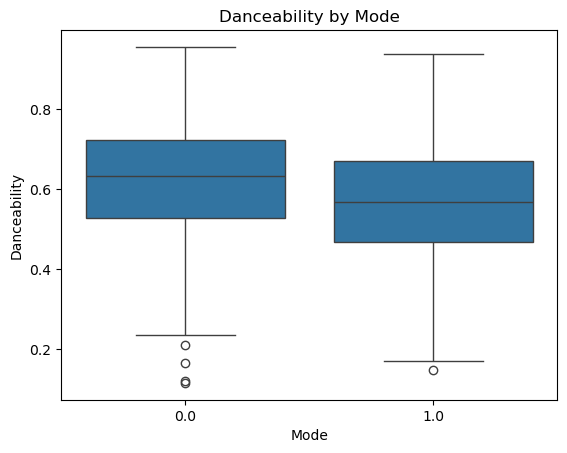

In [65]:
sns.boxplot(x='mode', y='danceability', data=df_combined)
plt.title('Danceability by Mode')
plt.xlabel('Mode')
plt.ylabel('Danceability')
plt.show()

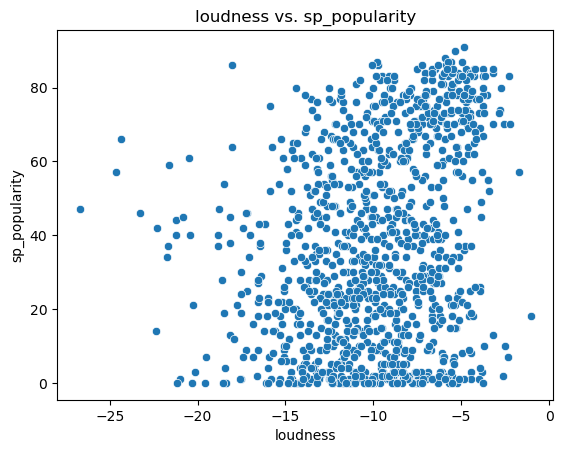

In [66]:
sns.scatterplot(x='loudness', y='sp_popularity', data=df_combined)
plt.title('loudness vs. sp_popularity')
plt.xlabel('loudness')
plt.ylabel('sp_popularity')
plt.show()

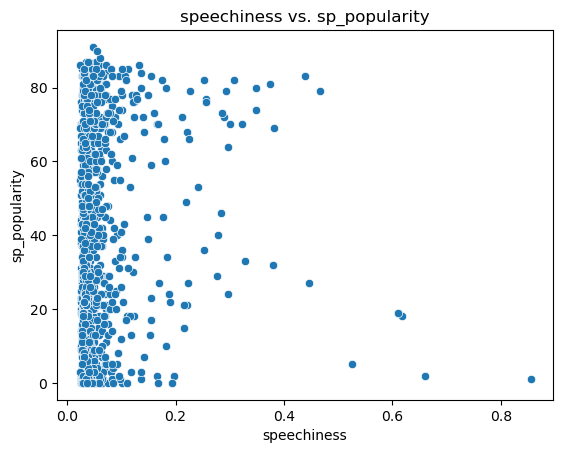

In [67]:
sns.scatterplot(x='speechiness', y='sp_popularity', data=df_combined)
plt.title('speechiness vs. sp_popularity')
plt.xlabel('speechiness')
plt.ylabel('sp_popularity')
plt.show()

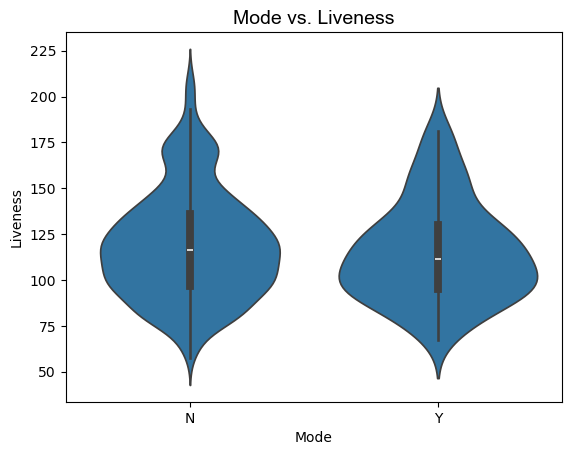

In [68]:
sns.violinplot(x='colab', y='tempo', data=df_combined)
plt.title('Mode vs. Liveness', fontdict={'fontsize': 14, 'fontweight': 'light', 'fontfamily': 'Arial'})
plt.xlabel('Mode')
plt.ylabel('Liveness')
plt.show()

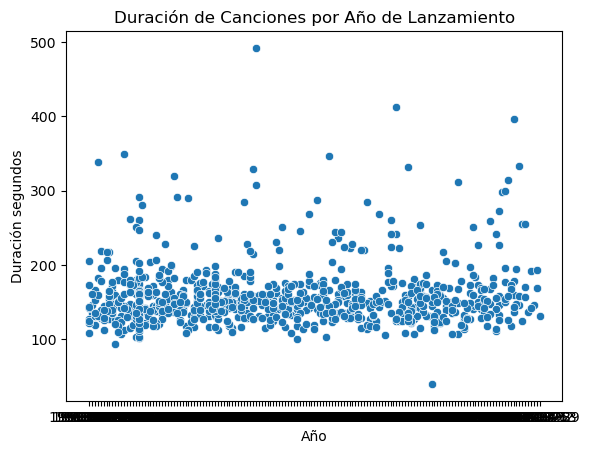

In [69]:

sns.scatterplot(x='peak_date', y='duration', data=df_combined)
plt.title('Duración de Canciones por Año de Lanzamiento')
plt.xlabel('Año')
plt.ylabel('Duración segundos')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


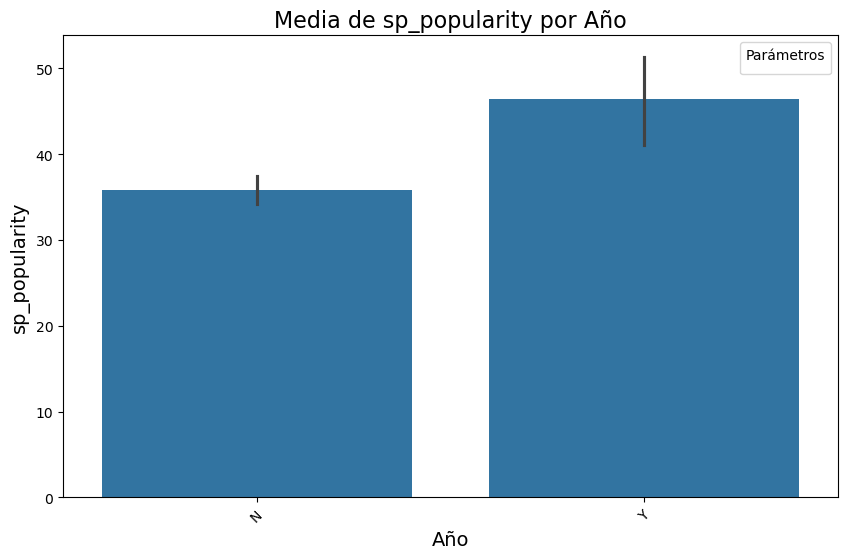

In [70]:

bar_media_por_año(df_combined, ['sp_popularity'], year_column='colab', figsize=(10,6), grid=False)

In [71]:
df_combined.columns

Index(['title', 'title_spotify', 'artist', 'album', 'colab', 'id',
       'release_date', 'peak_rank', 'peak_date', 'peak_year', 'lustrum',
       'weeks', 'sp_popularity', 'tempo', 'duration', 'key', 'mode',
       'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'before_1964'],
      dtype='object')

In [74]:
df_combined.columns

Index(['title', 'title_spotify', 'artist', 'album', 'colab', 'id',
       'release_date', 'peak_rank', 'peak_date', 'peak_year', 'lustrum',
       'weeks', 'sp_popularity', 'tempo', 'duration', 'key', 'mode',
       'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'before_1964'],
      dtype='object')

In [73]:
df_combined.columns()

TypeError: 'Index' object is not callable

In [ ]:
df_combined['release_date'] = pd.to_datetime(df_combined['release_date'], errors='coerce')

date_formats = ['%Y-%m-%d']  

# Función para intentar diferentes formatos
def parse_dates(date_str):
    for fmt in date_formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT

# Aplicar la función a la columna
df_combined['release_date'] = df_combined['release_date'].apply(parse_dates)

def parse_years(date_str):
    if pd.to_datetime(date_str, format='%Y', errors='coerce') is not pd.NaT:
        return pd.to_datetime(date_str, format='%Y').replace(month=1, day=1)
    return pd.NaT

# Aplicar la función a la columna
df_combined['release_date'] = df_combined['release_date'].apply(lambda x: parse_years(x) if pd.isna(pd.to_datetime(x, errors='coerce')) else pd.to_datetime(x, errors='coerce'))

df_combined = df_combined.dropna(subset=['release_date'])

df_combined['year_release'] = df_combined['release_date'].dt.year

/var/folders/b7/hph07_m53vv3yzmmfgf8b7fm0000gn/T/ipykernel_27902/2307506475.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['year_release'] = df_combined['release_date'].dt.year


In [ ]:
df_filtrado = df_combined[df_combined['lustrum'] == '1990-1994']
df_filtrado

,title,title_spotify,artist,album,colab,id,release_date,peak_rank,peak_date,peak_year,...,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,before_1964,year_release
984,I'd Do Anything for Love (But I Won't Do That),I'd Do Anything For Love (But I Won't Do That)...,Meat Loaf,Bat Out Of Hell II: Back Into Hell,N,NaN,1993-01-01,NaN,NaN,1993,...,0.419,0.672,-6.353,0.092,0.623,0.0,0.412,0.304,False,1993


In [ ]:
df_combined['year_release']

0       1958
10      2005
13      1984
15      1976
22      1961
        ... 
1009    1999
1011    1999
1023    2000
1036    2002
1038    2003
Name: year_release, Length: 152, dtype: int32

/var/folders/b7/hph07_m53vv3yzmmfgf8b7fm0000gn/T/ipykernel_27902/2015936510.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['difference'] = np.where(df_combined['peak_year'] >= df_combined['year_release'],


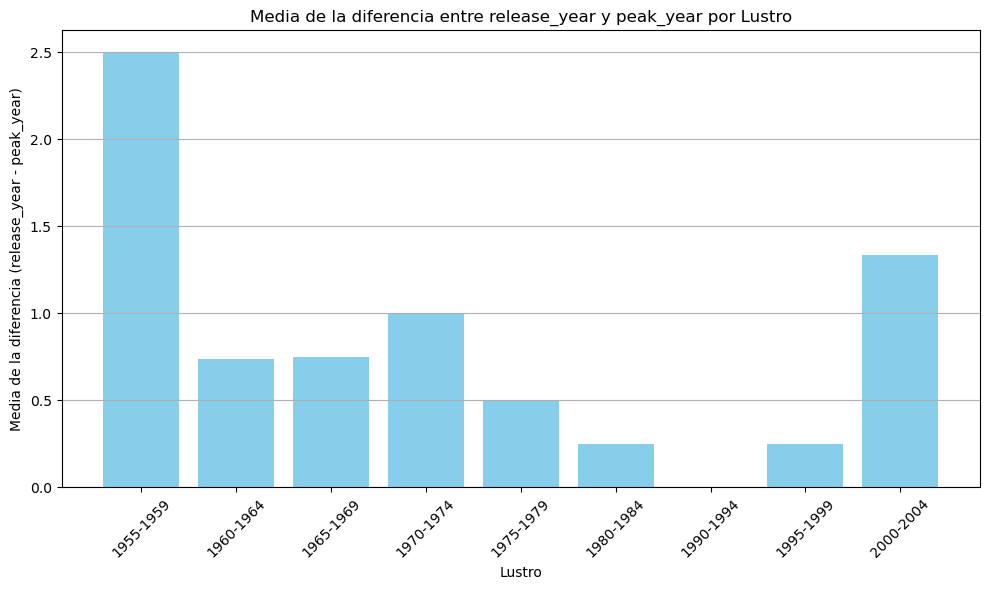

In [ ]:
import numpy as np

df_combined['difference'] = np.where(df_combined['peak_year'] >= df_combined['year_release'],
                                     df_combined['peak_year'] - df_combined['year_release'],
                                     np.nan)

# Agrupar por lustro y calcular la media
mean_difference = df_combined.groupby('lustrum')['difference'].mean().reset_index()

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(mean_difference['lustrum'], mean_difference['difference'], color='skyblue')
plt.xlabel('Lustro')
plt.ylabel('Media de la diferencia (release_year - peak_year)')
plt.title('Media de la diferencia entre release_year y peak_year por Lustro')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



In [ ]:



df_filtrado = df_combined[df_combined['lustrum'] == '1990-1994']

df_filtrado



,title,title_spotify,artist,album,colab,id,release_date,peak_rank,peak_date,peak_year,...,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,before_1964,year_release,difference
984,I'd Do Anything for Love (But I Won't Do That),I'd Do Anything For Love (But I Won't Do That)...,Meat Loaf,Bat Out Of Hell II: Back Into Hell,N,NaN,1993-01-01,NaN,NaN,1993,...,0.672,-6.353,0.092,0.623,0.0,0.412,0.304,False,1993,0.0
